# House Price Prediction through Logistic Regression

## 1. 데이터 탐색

### 1.1 문제 정의
본 과제의 목적은 집의 정보를 이용해 가격을 예측하는 것이다.
단, 각 feature들의 parameter들을 update 하는 Backpropagation 과정을 직접 구현하여 Regression 을 진행한다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Real estate.csv")

In [3]:
print(data.shape)

(414, 8)


In [4]:
data.isnull().sum() #checking for total null values

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

데이터의 전체 개수는 414개이며, 변수(feature)의 개수는 7개이다.
결측값(null data)은 없다.

### 1.2 변수 설명

* No : 집을 구분하는 번호 (index)
* X1 transaction date : 집 거래 날짜
* X2 house age : 집이 얼마나 오래 되었는지 (지은 뒤 흐른 시간)
* X3 distance to the nearest MRT station : 가장 가까운 대중교통까지의 거리 (Mass Rapid Transit)
* X4 number of convenience stores : 근처 편의점 개수
* X5 latitude : 경도
* X6 longitude : 위도
* Y house price of unit area : 집의 가격 (Target Variable)

In [5]:
var_list =  ['No','X1 transaction date','X2 house age','X3 distance to the nearest MRT station',
             'X4 number of convenience stores','X5 latitude','X6 longitude','Y house price of unit area']

In [6]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### 1.3 변수 시각화 (목적변수 - 집의 가격)

In [7]:
# descriptive statistics summary (기술적 통계)
data['Y house price of unit area'].describe()

count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: Y house price of unit area, dtype: float64

target variable인 집의 가격에 대한 통계 summary는 위와 같다.
가장 싼 집(min)은 7.6, 가장 비싼 집(max)은 117.5이며 평균가는 약 38이다.

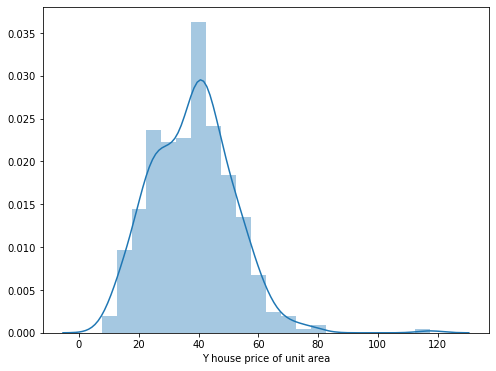

In [8]:
# histogram
f, ax = plt.subplots(figsize = (8,6))
sns.distplot(data['Y house price of unit area'])
plt.show()

target variable인 집값의 분포를 히스토그램을 통해 확인해보았다.
정규분포를 따르도록 Normalize(정규화) 해주어야 함을 알 수 있다.

### 1.4 변수 간 관계 파악 (correlation)

In [ ]:
sns.heatmap(data.corr(), fmt = '.2f', annot=True,square = True, cmap = 'RdYlGn', linewidths = 0.2, annot_kws={"size": 20})
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

#### 집 값(Y)과 상관도가 상대적으로 높은 변수들은 다음과 같다.

1. X3 distance to the neares MRT station : - 0.67 (음의 상관관계)
2. X4 num of convinence store : 0.57 (양의 상관관계)
3. X5 latitude : 0.55 (양의 상관관계)
4. X6 longtitude : 0.52 (양의 상관관계)

#### 집 값(Y)과 상관도가 상대적으로 낮은 (0에 가까운) 변수들은 다음과 같다. (No 제외)

1. X1 transaction date : 0.09
2. X2 house date : -0.21

그런데, 변수들 간 높은 상관관계를 보이는 변수들이 있다.

#### Multicollinearity (다중 공선성)

회귀분석에서 변수들 간에 강한 상관관계가 나타나는 문제. 적절한 회귀분석을 위해 해결해야 하는 문제가 된다.
상관관계가 높은 변수를 제거하여 해결할 수 있다.

When predictor variables in the same regression model are correlated, they cannot independently predict the value of the dependent variable. In other words, they explain some of the same variance in the dependent variable, which in turn reduces their statistical significance. Multicollinearity describes a situation in which more than two predictor variables are associated so that, when all are included in the model, a decrease in statistical significance is observed.

1. X3 & X6 : -0.81 (높은 음의 상관관계)
2. X3 & X4 : -0.60
3. X3 & X5 : -0.59

### 1.5 각 변수의 분포 시각화

In [ ]:
data_plot = pd.concat([data['Y house price of unit area'], data['X2 house age']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='X2 house age', y="Y house price of unit area", data=data_plot)

In [ ]:
sns.distplot(data['X2 house age'], kde=True, rug=True)
plt.title("Distribution Plot of X2 house age")
plt.show()

In [ ]:
data_plot = pd.concat([data['Y house price of unit area'], data['X3 distance to the nearest MRT station']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='X3 distance to the nearest MRT station', y="Y house price of unit area", data=data_plot)


In [ ]:
sns.distplot(data['X3 distance to the nearest MRT station'], kde=True, rug=True)
plt.title("Distribution Plot of X3 distance to the nearest MRT station")
plt.show()

In [ ]:
data_plot = pd.concat([data['Y house price of unit area'], data['X4 number of convenience stores']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='X4 number of convenience stores', y="Y house price of unit area", data=data_plot)

In [ ]:
sns.distplot(data['X4 number of convenience stores'], kde=True, rug=True)
plt.title("Distribution Plot of X4 number of convenience stores")
plt.show()

In [ ]:
data_plot = pd.concat([data['Y house price of unit area'], data['X5 latitude']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='X5 latitude', y="Y house price of unit area", data=data_plot)

In [ ]:
sns.distplot(data['X5 latitude'], kde=True, rug=True)
plt.title("Distribution Plot of X5 latitude")
plt.show()

In [ ]:
data_plot = pd.concat([data['Y house price of unit area'], data['X6 longitude']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='X6 longitude', y="Y house price of unit area", data=data_plot)

In [ ]:
sns.distplot(data['X6 longitude'], kde=True, rug=True)
plt.title("Distribution Plot of X6 longitude")
plt.show()

각 변수 별 데이터 분포를 그려보니 분포 그래프가 너무 기울어져 있거나 쏠려 있으며, 변수 간 데이터 단위의 차이 또한 크다.

예를 들어, 변수 X3 Dist to the nearest MRT station의 데이터 범위는 약 -1000에서 7000까지로 범위가 크며, 수의 단위도 천 단위인 반면, 변수 X2 House Age의 데이터 범위는 0에서 45 정도로 십의 자리 단위의 데이터이다. 

이렇게 변수 간 데이터의 단위 차이가 클 경우, 배웠듯이 각 theta값 (파라미터) 학습이 속도가 달라져 원하는 결과가 나오지 못하게 될 수 있다.

정규화 하기 전에 각 변수 데이터의 평균과 표준편차를 출력하면 다음과 같다.

In [ ]:
for var in var_list:
    print(var,"의 mean : ",data[var].mean())
    print(var,"의 std : ",data[var].std())
    print("\n")

다양한 정규화 방법 중, 각 변수 데이터의 평균으로 빼준 뒤 표준편차로 나누어 주는 정규화 방법을 선택해 정규화를 이후 진행한다.

![](https://mblogthumb-phinf.pstatic.net/MjAxODA2MjlfMTEz/MDAxNTMwMjAyMzgyNjE4.f-v7gKNUP1ryinUgrzOEvHgLKHoFv8DJkMJJ7aYAF_sg.C0DJ_D54LoQlvw0miyTEXdi4UczS7h1XrVegcaHQ5vQg.PNG.algosn/image.png?type=w800)

## 2. 데이터 전처리

### 2.1 이상치 제거

각 변수의 분포 그래프를 그려보았을 때, 집 값이 유난히 높은 데이터가 눈에 띄었다. 본 outlier를 제거한다.

In [ ]:
data.loc[data['Y house price of unit area'] > 100]

In [ ]:
data = data.loc[data['No']!=271]

### 2.2 정규화

In [ ]:
for var in var_list:
    data[var] = (data[var] - data[var].mean())/ data[var].std()
    print(var,"의 정규화 후 mean : ",data[var].mean())
    print(var,"의 정규화 후 std : ",data[var].std())
    print("\n")

## 1.6 정규화 후 변수 간 관계 파악

In [ ]:
sns.heatmap(data.corr(), fmt = '.2f', annot=True,square = True, cmap = 'RdYlGn', linewidths = 0.2, annot_kws={"size": 20})
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

정규화 후 변수(feature) 간 상관관계를 보여주는 히트맵을 다시 그려보았다.
정규화를 하더라도 데이터의 성격은 변하지 않기 때문에 정규화 전후에 거의 차이가 없음을 알 수 있다.

## 정규화 후 각 변수의 분포 시각화

In [ ]:
sns.distplot(data['X2 house age'], kde=True, rug=True)
plt.title("Normalized Distribution Plot of X2 house age")
plt.show()

In [ ]:
data_plot = pd.concat([data['Y house price of unit area'], data['X2 house age']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='X2 house age', y="Y house price of unit area", data=data_plot)

In [ ]:
sns.distplot(data['X3 distance to the nearest MRT station'], kde=True, rug=True)
plt.title("Normalized Distribution Plot of X3 distance to the nearest MRT station")
plt.show()

In [ ]:
data_plot = pd.concat([data['Y house price of unit area'], data['X3 distance to the nearest MRT station']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='X3 distance to the nearest MRT station', y="Y house price of unit area", data=data_plot)

In [ ]:
sns.distplot(data['X4 number of convenience stores'], kde=True, rug=True)
plt.title("Normalized Distribution Plot of X4 number of convenience stores")
plt.show()

In [ ]:
data_plot = pd.concat([data['Y house price of unit area'], data['X4 number of convenience stores']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='X4 number of convenience stores', y="Y house price of unit area", data=data_plot)

In [ ]:
sns.distplot(data['X5 latitude'], kde=True, rug=True)
plt.title("Normalized Distribution Plot of X5 latitude")
plt.show()

In [ ]:
data_plot = pd.concat([data['Y house price of unit area'], data['X5 latitude']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='X5 latitude', y="Y house price of unit area", data=data_plot)

In [ ]:
sns.distplot(data['X6 longitude'], kde=True, rug=True)
plt.title("Normalized Distribution Plot of X6 longitude")
plt.show()

In [ ]:
data_plot = pd.concat([data['Y house price of unit area'], data['X6 longitude']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='X6 longitude', y="Y house price of unit area", data=data_plot)

각 변수에 대해 정규화 한 결과, 각 변수 데이터의 평균과 표준편차가 맞춰져 데이터의 단위도 일정하게 정규화 되었다.정규화 하였으니 각 변수 별 theta값(파라미터) 학습이 비슷한 속도로 진행될 수 있게 되었다.

## 3. 변수 수정

상관관계 히트맵을 통해 파악할 수 있었듯, 타겟변수 집 값(Y)과 상관관계가 상대적으로 낮은 변수들에는 X1 transaction date과 X2 house date 이 있었다. 반면, 다른 변수들 간 상관관계가 높은 변수로는 X3가 있었다.

불필요한 변수가 지나치게 많을 경우, 오버피팅 될 가능성이 높다. 또한 변수들 간 상관관계가 높을 경우, 타겟변수를 독립적으로 예측하지 못해 모델의 유의성을 떨어뜨리는 다중공선성의 문제도 발생할 수 있었다.

따라서 더 높은 집값 예측 정확도와 높은 모델의 신뢰성을 위해 인덱스에 해당하는 No를 포함하여, X1, X2, X3 변수를 삭제하였다.

In [9]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [10]:
del data['No']
del data['X1 transaction date']
del data['X2 house age']
del data['X3 distance to the nearest MRT station']

In [11]:
data.head()

,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,10,24.98298,121.54024,37.9
1,9,24.98034,121.53951,42.2
2,5,24.98746,121.54391,47.3
3,5,24.98746,121.54391,54.8
4,5,24.97937,121.54245,43.1


## 4. 모델링 (Linear Regression)



In [12]:
##### Your Code(Node Loading/Start) #####
class PlusNode():
    def __init__(self):
        self.x, self.y, self.z = None, None, None
        
    def forward(self, x, y, z, a):
        self.x, self.y, self.z, self.a, self.b = x, y, z, a,  (x + y + z + a)
        return self.b
    
    def backward(self, dL):
        return dL, dL, dL, dL
    
class MinusNode():
    def __init__(self):
        self.x, self.y, self.z = None, None, None
        
    def forward(self, x, y):
        self.x, self.y, self.z = x, y, x - y
        return self.z
    
    def backward(self, dL):
        return dL, -1*dL
    
class MulNode():
    def __init__(self):
        self.x, self.y, self.z = None, None, None
        
    def forward(self, x, y):
        self.x, self.y, self.z = x, y, x*y
        return self.z
    
    def backward(self, dL):
        return self.y*dL, self.x*dL

class SquareNode():
    def __init__(self):
        self.x, self.z = None, None
    
    def forward(self, x):
        self.x, self.z = x, x*x
        return self.z
    
    def backward(self, dL):
        return 2*self.x*dL
        

class CostNode():
    def __init__(self):
        self.x, self.z = None, None
    
    def forward(self, x):
        self.x = x
        self.z = np.mean(self.x)
        return self.z
    
    def backward(self):
        return 1/len(self.x)*np.ones(shape = (self.x.shape))
    
class SigmoidNode():
    def __init__(self):
        self.x, self.y = None, None
        
    def forward(self, x):
        self.y = 1 / (1 + np.exp(-x))
        return self.y
    
    def backward(self, dL):
        return self.y * (1 - self.y) * dL
    
##### Your Code(Node Loading/End) #####

***
## Model Implementation

<img src="./images/2_2_image3.png">

In [13]:
##### Your Code(Model Implementation/Start) #####
Z14_node = MulNode()
Z15_node = MulNode()
Z16_node = MulNode()
Z2_node = PlusNode()
Z3_node = SigmoidNode()
Z4_node = MinusNode()
L_node = SquareNode()
J_node = CostNode()
##### Your Code(Model Implementation/Start) #####

***
## Learning Preparation
그 후에 학습에 필요한 값들을 정의하고, 결과를 확인하기 위한 list들을 초기화해준다.

In [14]:
theta4, theta5, theta6, theta7 = 0, 0, 0, 0
lr = 0.03 # learning rate 설정
epochs = 10000 # 총 epoch 설정

cost_list = []
theta4_list, theta5_list, theta6_list, theta7_list = [], [], [], []

In [17]:
for i in range(epochs):
    Z14 = Z14_node.forward(theta4, data['X4 number of convenience stores'])
    Z15 = Z15_node.forward(theta5, data['X5 latitude'])
    Z16 = Z16_node.forward(theta6, data['X6 longitude'])
    Z2 = Z2_node.forward(Z14, Z15, Z16, theta7)
    Z3 = Z3_node.forward(Z2)
    Z4 = Z4_node.forward(data['Y house price of unit area'], Z3)
    L = L_node.forward(Z4)
    J = J_node.forward(L)
    
    dL = J_node.backward()
    dZ4 = L_node.backward(dL)
    dY, dZ3 = Z4_node.backward(dZ4)
    dZ2 = Z3_node.backward(dZ3)
    dZ4, dZ5, dZ6, dTheta7 = Z2_node.backward(dZ2)
    dTheta4, dX4 = Z14_node.backward(dZ4)
    dTheta5, dX5 = Z15_node.backward(dZ5)
    dTheta6, dX6 = Z16_node.backward(dZ6)
    
    theta4 = theta4 - lr*np.sum(dTheta4)
    theta5 = theta5 - lr*np.sum(dTheta5)
    theta6 = theta6 - lr*np.sum(dTheta6)
    theta7 = theta7 - lr*np.sum(dTheta7)
    
    cost_list.append(J)
    theta4_list.append(theta4)
    theta5_list.append(theta5)
    theta6_list.append(theta6)
    theta7_list.append(theta7)

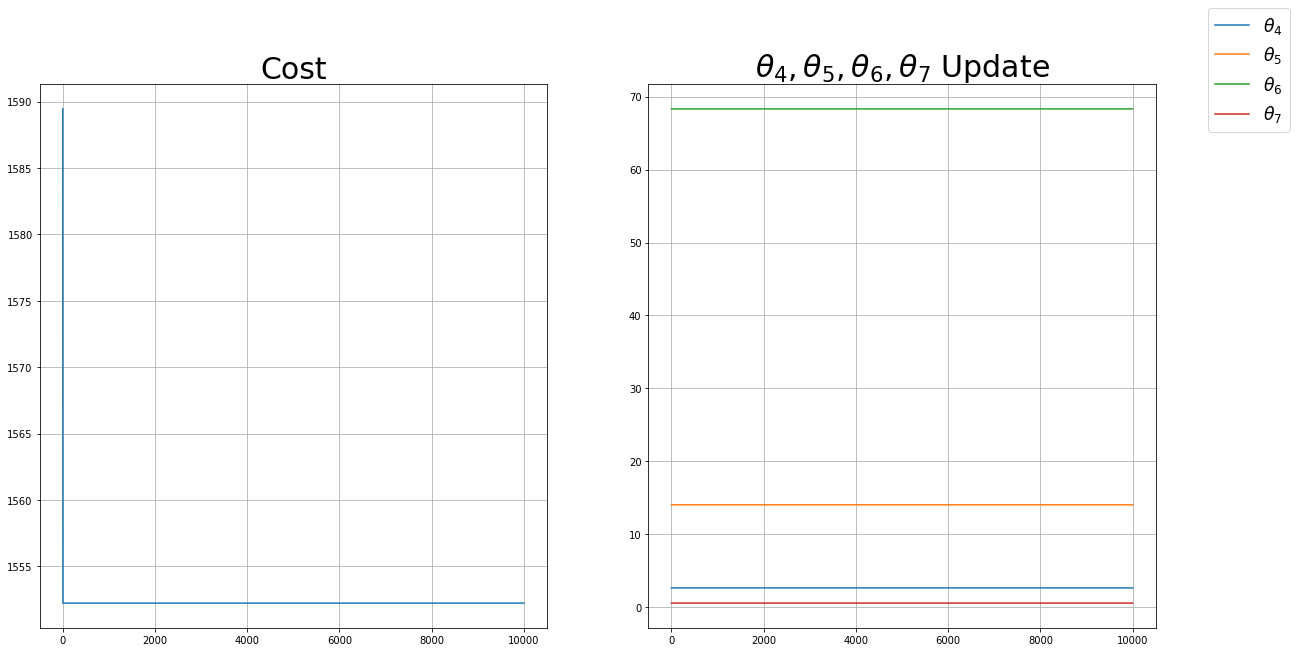

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))
ax1.grid()
ax1.plot(cost_list)
ax1.set_title("Cost", fontsize = 30)

ax2.plot(theta4_list, label = r"$\theta_{4}$")
ax2.plot(theta5_list, label = r"$\theta_{5}$")
ax2.plot(theta6_list, label = r"$\theta_{6}$")
ax2.plot(theta7_list, label = r"$\theta_{7}$")
fig.legend(fontsize = 'xx-large')
ax2.set_title(r"$\theta_{4}, \theta_{5}, \theta_{6},\theta_{7}$ Update", fontsize = 30)
ax2.grid()
